In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
from scipy.stats import shapiro
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('airbnb bali-regression features.csv')
features

,max_guest,price,service_level_PLUS,service_level_SUPERHOST,type_Entire Unit,pool_Pool,kitchen_Kitchen
0,2.0,42.0,0,0,1,1,1
1,2.0,38.0,0,0,1,1,1
2,2.0,47.0,0,1,0,1,1
3,6.0,215.0,0,0,1,1,1
4,4.0,280.0,1,0,1,1,1
...,...,...,...,...,...,...,...
295,5.0,171.0,0,0,1,1,0
296,2.0,50.0,0,0,1,1,0
297,2.0,19.0,0,0,1,0,1
298,2.0,100.0,0,0,1,1,1


# 4. Model Building

## 4.1. First model

In [3]:
# We use all variables here

feat1 = features[['price', 'max_guest', 'service_level_PLUS', 'service_level_SUPERHOST', 'type_Entire Unit', 'pool_Pool', 'kitchen_Kitchen']]

feat1 # variables rearranged


,price,max_guest,service_level_PLUS,service_level_SUPERHOST,type_Entire Unit,pool_Pool,kitchen_Kitchen
0,42.0,2.0,0,0,1,1,1
1,38.0,2.0,0,0,1,1,1
2,47.0,2.0,0,1,0,1,1
3,215.0,6.0,0,0,1,1,1
4,280.0,4.0,1,0,1,1,1
...,...,...,...,...,...,...,...
295,171.0,5.0,0,0,1,1,0
296,50.0,2.0,0,0,1,1,0
297,19.0,2.0,0,0,1,0,1
298,100.0,2.0,0,0,1,1,1


In [4]:
x = feat1.iloc[:, 1:] # predictors
y = feat1.iloc[:, 0] # target

In [5]:
from sklearn.model_selection import train_test_split

# Dataset split
# 70:30 split
test_ratio = 0.3
random_state = 9

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_ratio, random_state= random_state)

In [6]:
import statsmodels.api as sm
# using statsmodel API

modelAPI = sm.OLS(y_train, sm.add_constant(X_train)).fit() #statsmodel API does not automatically add Y-intercept
summary_1 = modelAPI.summary()
summary_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     45.45
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           5.12e-35
Time:                        14:43:48   Log-Likelihood:                -1235.2
No. Observations:                 210   AIC:                             2484.
Df Residuals:                     203   BIC:                             2508.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -72.4640     20.144     -3.597      0.000    -112.183     -32.745
max_guest                  41.9633      2.900     14.469      0.000      36.245      47.682
service_level_PLUS         49.7885     26.751      1.861      0.064      -2.956     102.533
service_level_SUPERHOST     5.1780     12.989      0.399      0.691     -20.434      30.790
type_Entire Unit           33.0113     15.902      2.076      0.039       1.658      64.365
pool_Pool                  37.1129     18.047      2.056      0.041       1.529      72.696
kitchen_Kitchen           -11.0265     15.970     -0.690      0.491     -42.515      20.462
==============================================================================
Omnibus:                       59.203   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.365
Skew:                           0.713   Prob(JB):                    1.17e-130
Kurtosis:                      11.146   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We finally built our very first model! But is it a good model?

First thing first, let's see the p-values of our features. If we choose our alpha at 0.05, we can see that service level plus, service level Superhost, and kitchen have p-values that are  larger than 0.05. Therefore, we can conclude that those variables do not make good predictors. So we can eliminate those, and then try building a new model with the remaining features.

## 4.2 second model

In [7]:
#In this model we eliminate service_level and kitchen

feat2 = features[['price', 'max_guest', 'type_Entire Unit', 'pool_Pool']]

feat2

,price,max_guest,type_Entire Unit,pool_Pool
0,42.0,2.0,1,1
1,38.0,2.0,1,1
2,47.0,2.0,0,1
3,215.0,6.0,1,1
4,280.0,4.0,1,1
...,...,...,...,...
295,171.0,5.0,1,1
296,50.0,2.0,1,1
297,19.0,2.0,1,0
298,100.0,2.0,1,1


In [8]:
x = feat2.iloc[:, 1:] # predictors
y = feat2.iloc[:, 0] # target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_ratio, random_state= random_state)

In [10]:
modelAPI = sm.OLS(y_train, sm.add_constant(X_train)).fit() #statsmodel API does not automatically add Y-intercept


In [11]:
c, x1, x2, x3 = modelAPI.params

In [12]:
summary_2 = modelAPI.summary()
summary_2

# All of the predictors are statistically significant (alpha = 0.05)
# This one makes better model (based on p-values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     89.42
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           4.32e-37
Time:                        14:43:48   Log-Likelihood:                -1237.0
No. Observations:                 210   AIC:                             2482.
Df Residuals:                     206   BIC:                             2495.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -69.1046     19.227     -3.594      0.000    -107.011     -31.198
max_guest           41.3287      2.824     14.636      0.000      35.762      46.896
type_Entire Unit    27.8700     13.605      2.048      0.042       1.047      54.693
pool_Pool           37.5992     17.599      2.136      0.034       2.901      72.297
==============================================================================
Omnibus:                       59.901   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.647
Skew:                           0.775   Prob(JB):                    1.32e-116
Kurtosis:                      10.654   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Adjusted R2 go down a bit
- Based on p-values, those independent variables make good predictors

In [13]:
print(f'y = {c:.2f} + {x1:.2f}x1 + {x2:.2f}x2 + {x3:.2f}x3') # This is our regression function

y = -69.10 + 41.33x1 + 27.87x2 + 37.60x3


In [14]:
y_pred = modelAPI.predict(sm.add_constant(X_test))
len(y_pred)

90

In [15]:
len(y_test)

90

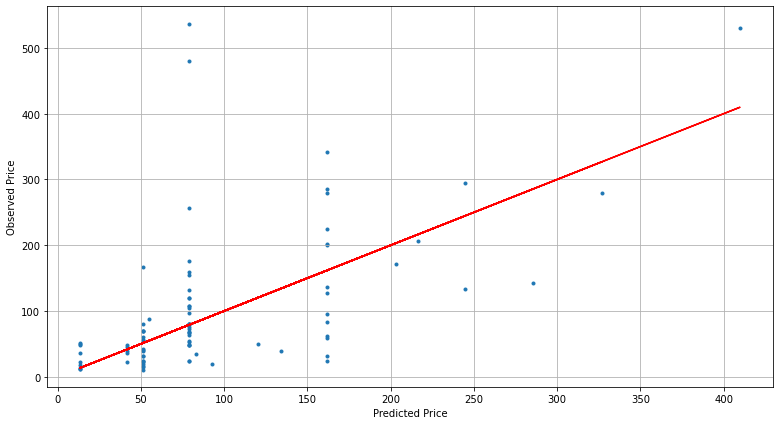

In [16]:
plt.figure(figsize = [13,7])
plt.scatter(y_pred,y_test, marker = '.')
plt.plot(y_pred, y_pred, color = 'red')

plt.xlabel('Predicted Price')
plt.ylabel('Observed Price')
plt.grid()
plt.show()

In [17]:
s1 = pd.Series(y_pred, name = 'price_pred')

In [18]:
prices2 = pd.concat([y_test, s1], axis = 1)
prices2['residual'] = prices2['price'] - prices2['price_pred']

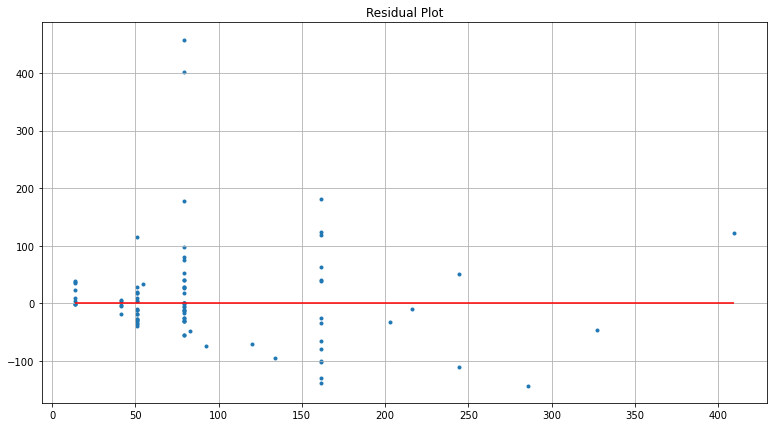

In [19]:
# Residual Plot

plt.figure(figsize = [13,7])
plt.scatter(prices2['price_pred'], prices2['residual'], marker = '.')
plt.hlines(y = 0, xmin = prices2['price_pred'].min(), xmax = prices2['price_pred'].max(), color = 'red')
plt.title('Residual Plot')

plt.grid()
plt.show()

# seems like our model can better predict for lower range of price
# we do not know for sure why and we can only guess
# data is quite sparse for higher price range
# as price increases, villas and hotels offer more amenities
# there are also other factors not taken into account into our model
# such as supply and demand, popularity, etc.
# not to forget that the data is gained during covid19 pandemic

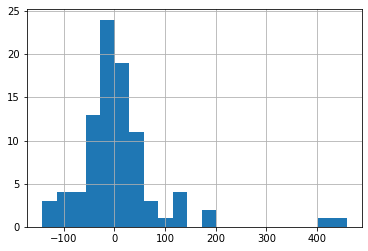

In [20]:
# Distribution of residual

plt.hist(prices2['residual'], bins = 21)

plt.grid()
plt.show()

# Data is skewed

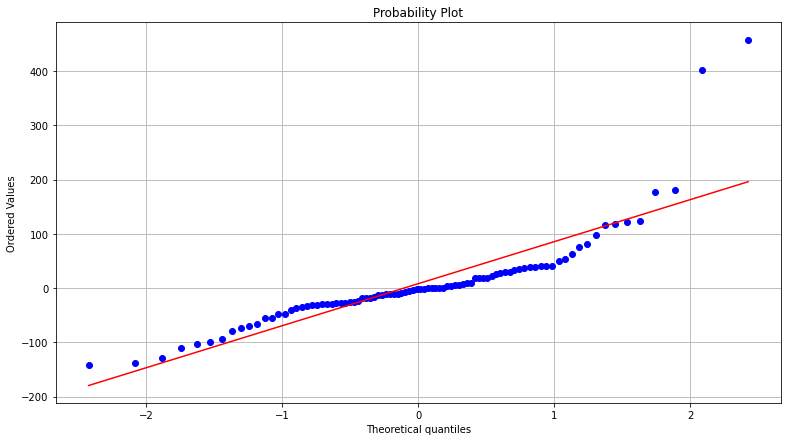

In [21]:
import pylab

plt.figure(figsize = [13,7])
stats.probplot(prices2['residual'], plot = plt)

plt.grid()
plt.show()

In [22]:
# alpha = 0.05

stats.shapiro(prices2['residual']) #very small p-value

# p-value much smaller than alpha --> the residuals are not normally distributed
# Since the normality assumption is violated, The second model is a bad one.
# Next, we try to transform the target feature

ShapiroResult(statistic=0.7744854688644409, pvalue=1.9719222088543376e-10)

## 4.3. Third model

In [23]:
# For our third model, we are using the same predictors as those of second model
# The difference is we log-transform the target so as to reduce the skew of this variable
# Thus, making the data more normal and reducing the model's bias
# We use natural logarithm (with base number of Euler's number or e)

feat3 = features[['price', 'max_guest', 'type_Entire Unit', 'pool_Pool']]
feat3['log_price'] = np.log(feat3['price']) # This is when the log-transformation happens
feat3 = feat3.drop(labels = 'price', axis = 1)
feat3 = feat3[['log_price', 'max_guest', 'type_Entire Unit', 'pool_Pool']]
feat3

,log_price,max_guest,type_Entire Unit,pool_Pool
0,3.737670,2.0,1,1
1,3.637586,2.0,1,1
2,3.850148,2.0,0,1
3,5.370638,6.0,1,1
4,5.634790,4.0,1,1
...,...,...,...,...
295,5.141664,5.0,1,1
296,3.912023,2.0,1,1
297,2.944439,2.0,1,0
298,4.605170,2.0,1,1


In [24]:
x = feat3.drop(labels = 'log_price', axis = 1)
y = feat3['log_price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_ratio, random_state= random_state)

In [26]:
modelAPI = sm.OLS(y_train, sm.add_constant(X_train)).fit() #statsmodel API does not automatically add Y-intercept


summary_3 = modelAPI.summary()
summary_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     56.34
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.23e-26
Time:                        14:43:49   Log-Likelihood:                -218.61
No. Observations:                 210   AIC:                             445.2
Df Residuals:                     206   BIC:                             458.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7068      0.151     17.977      0.000       2.410       3.004
max_guest            0.1969      0.022      8.905      0.000       0.153       0.241
type_Entire Unit     0.5215      0.107      4.894      0.000       0.311       0.732
pool_Pool            0.6543      0.138      4.747      0.000       0.383       0.926
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.992
Skew:                           0.227   Prob(JB):                        0.369
Kurtosis:                       2.856   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_pred = modelAPI.predict(sm.add_constant(X_test))

In [28]:
r2_3 = r2_score(y_true = y_train, y_pred = modelAPI.predict(sm.add_constant(X_train)))
r2_3

0.4506880241054766

In [29]:
r2_score(y_true = y_test, y_pred = y_pred) # calculating R-squared of test set

# R-squared is not too different from that of X_train --> model is valid

0.43279739761413394

In [30]:
ypred_1 = y_pred

In [31]:
c, x1, x2, x3 = modelAPI.params
print(f'y = {c:.3f} + {x1:.3f}x1 + {x2:.3f}x2 + {x3:.3f}x3') # This is our regression function

y = 2.707 + 0.197x1 + 0.521x2 + 0.654x3


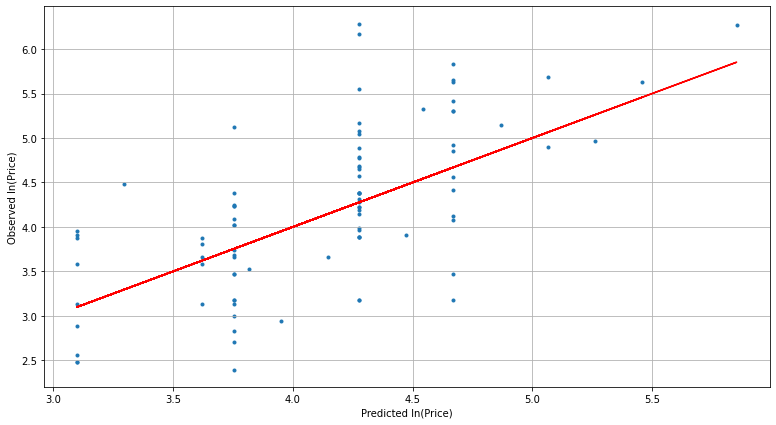

In [32]:
plt.figure(figsize = [13,7])
plt.scatter(y_pred,y_test, marker = '.')
plt.plot(y_pred, y_pred, color = 'red')

plt.xlabel('Predicted ln(Price)')
plt.ylabel('Observed ln(Price)')
plt.grid()
plt.show()

In [33]:
s1 = pd.Series(y_pred, name = 'logprice_pred')

In [34]:
prices3 = pd.concat([y_test, s1], axis = 1)
prices3['residual'] = prices3['log_price'] - prices3['logprice_pred']

In [35]:
prices3

,log_price,logprice_pred,residual
39,4.477337,3.297623,1.179714
38,5.686975,5.064153,0.622822
183,2.564949,3.100694,-0.535744
13,4.779123,4.276436,0.502687
90,3.135494,3.622170,-0.486675
...,...,...,...
77,2.484907,3.100694,-0.615787
80,3.988984,4.276436,-0.287452
78,4.382027,3.754960,0.627066
101,5.545177,4.276436,1.268741


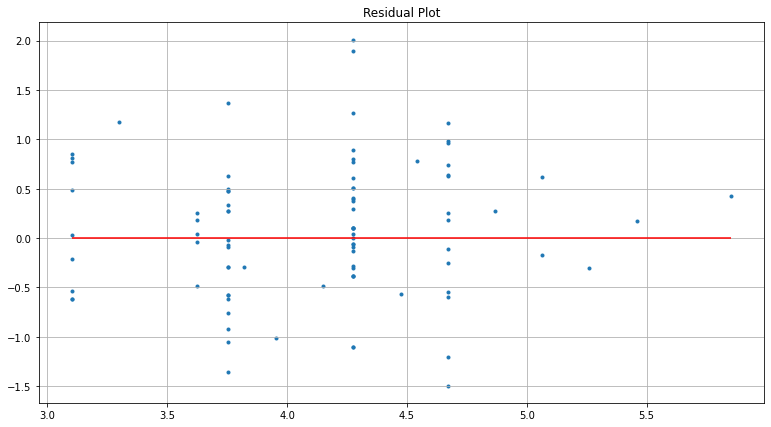

In [36]:
plt.figure(figsize = [13,7])
plt.scatter(prices3['logprice_pred'], prices3['residual'], marker = '.')
plt.hlines(y = 0, xmin = prices3['logprice_pred'].min(), xmax = prices3['logprice_pred'].max(), color = 'red')
plt.title('Residual Plot')

plt.grid()
plt.show()

# Considering the value of adjusted R2 that is not very high, it is not surprising that the residuals are not scattered closely to the red line
# However, low R2 does not mean that the model is bad, it simply means that the data has high variability

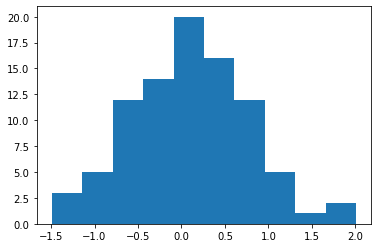

In [37]:
# For the next step, we want to know if the residuals are normally distributed

plt.hist(prices3['residual'])
plt.show()

# looks quite normal

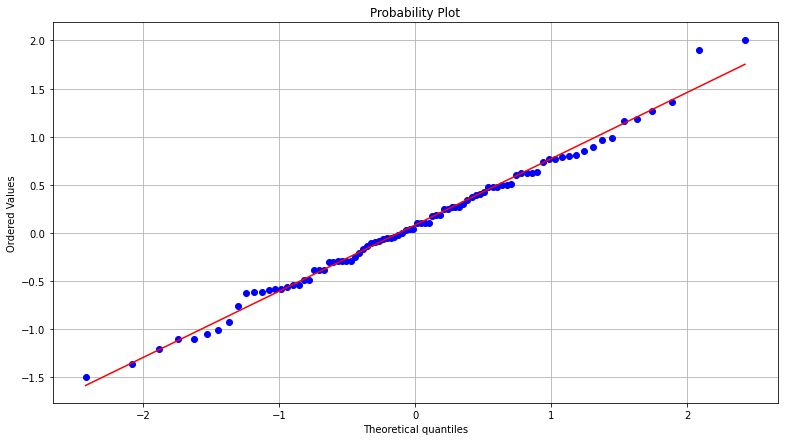

In [38]:
plt.figure(figsize = [13,7])
stats.probplot(prices3['residual'], plot = plt)

plt.grid()
plt.show()

In [39]:
# From graphical evaluation, we can see that the residuals are normally distributed
# But to make sure, we want to run Shapiro-Wilk Test
# chosen alpha = 0.05

stats.shapiro(prices3['residual'])

# p-value is larger than 0.05 --> the distribution of this data is no different from normal distribution
# Therefore, the assumption of normality is not violated by this model

ShapiroResult(statistic=0.9915340542793274, pvalue=0.8372133374214172)

In [40]:
# Prediction interval

sum_err = sum(prices3['residual']**2)
stdev = (1/(len(prices3) -2 ) * sum_err)**0.5
z_score = stats.norm.ppf(1 - (1-0.95)/2)
interval3 = z_score*stdev

interval3

1.3510675385811342

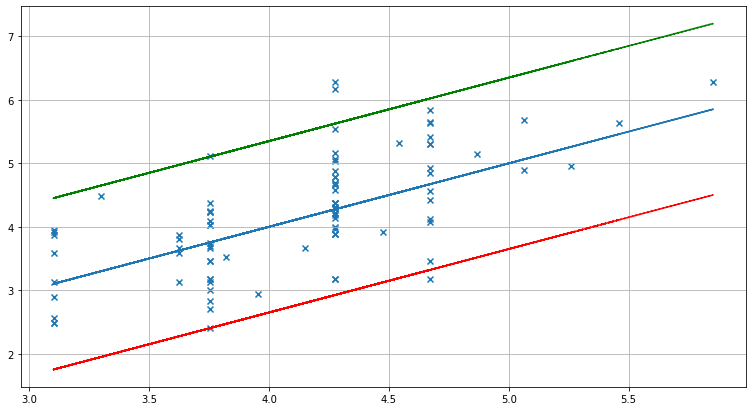

In [41]:
# Calculating the prediction interval
# prediction interval is the range of value where the predicted value will fall 

plt.figure(figsize = [13,7])
plt.plot(y_pred, y_pred)
plt.plot(y_pred, y_pred+interval3, color = 'green', linestyle = '--')
plt.plot(y_pred, y_pred-interval3, color = 'red', linestyle = '--')
plt.scatter(y_pred,y_test, marker = 'x')

plt.grid()
plt.show()

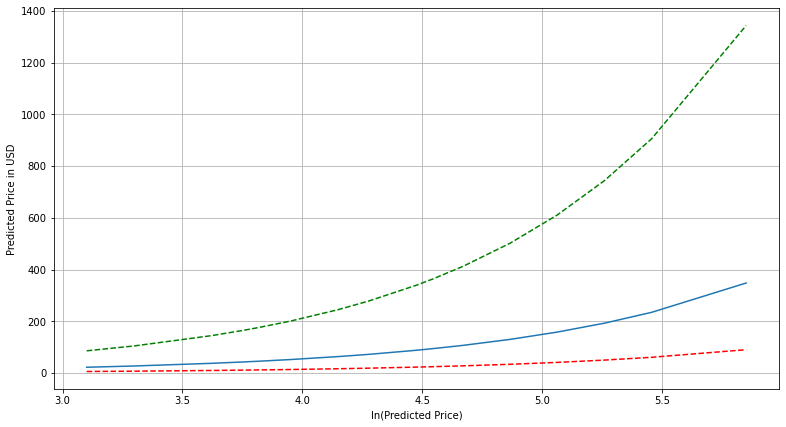

In [42]:
# We should not forget that our target was log-transformed
# Therefore, we should revert it back to its original form by using exponential function with the base of Euler's number

plt.figure(figsize = [13,7])
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values()))
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values() + interval3), linestyle = '--', color = 'green')
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values() - interval3), linestyle = '--', color = 'red')

plt.xlabel('ln(Predicted Price)')
plt.ylabel('Predicted Price in USD')
plt.grid()
plt.show()

Conclusion:
- The model can predict hotel/villa price fairly well at lower price range. However, as the predicted price increases the interval also increases exponentially

In [43]:
from sklearn.metrics import mean_squared_error
import math


MSE3 = mean_squared_error(prices3['log_price'],prices3['logprice_pred'])
RMSE3 = math.sqrt(MSE3)

print(f'MSE : {MSE3:.3f} , RMSE : {RMSE3:.3f}')

MSE : 0.465 , RMSE : 0.682


In [44]:
from sklearn.metrics import mean_absolute_error

MAE3 = mean_absolute_error(prices3['log_price'],prices3['logprice_pred'])

print(f'MAE : {MAE3:.3f}')

MAE : 0.537


## 4.4. Fourth Model

In [45]:
# From the first model, we already know that service_level with three classes (Regular, Superhost, and Plus)
# do not make good predictor (p-value is larger than alpha)
# However, we would like to examine whether re-binning this variable into 2 classes (Plus and Non-Plus) would make any difference
# Therefore, in we elminate the dummy variable 'service_level_SUPERHOST' in the features

feat4 = features
feat4['log_price'] = np.log(feat4['price'])
feat4 = feat4.drop(labels = ['price', 'service_level_SUPERHOST', 'kitchen_Kitchen'], axis = 1)
feat4

,max_guest,service_level_PLUS,type_Entire Unit,pool_Pool,log_price
0,2.0,0,1,1,3.737670
1,2.0,0,1,1,3.637586
2,2.0,0,0,1,3.850148
3,6.0,0,1,1,5.370638
4,4.0,1,1,1,5.634790
...,...,...,...,...,...
295,5.0,0,1,1,5.141664
296,2.0,0,1,1,3.912023
297,2.0,0,1,0,2.944439
298,2.0,0,1,1,4.605170


In [46]:
x = feat4.iloc[:,0:-1]
y = feat4.iloc[:, -1]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_ratio, random_state= random_state)

In [48]:
modelAPI = sm.OLS(y_train, sm.add_constant(X_train)).fit() #statsmodel API does not automatically add Y-intercept


summary_4 = modelAPI.summary()
summary_4

# From the summary we can see that service_level_PLUS has p-value larger than our chosen alpha (0.05)
# Therefore, we can infer that accommodations that are granted PLUS status have prices that are different from
# those of REGULAR and SUPERHOST
# So we want to examine whether the fourth model is better than the third model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     44.94
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           4.60e-27
Time:                        14:43:51   Log-Likelihood:                -215.40
No. Observations:                 210   AIC:                             440.8
Df Residuals:                     205   BIC:                             457.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6890      0.149     18.069      0.000       2.396       2.982
max_guest              0.1989      0.022      9.106      0.000       0.156       0.242
service_level_PLUS     0.4938      0.196      2.520      0.013       0.107       0.880
type_Entire Unit       0.5167      0.105      4.911      0.000       0.309       0.724
pool_Pool              0.6360      0.136      4.667      0.000       0.367       0.905
==============================================================================
Omnibus:                        2.418   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.365
Skew:                           0.258   Prob(JB):                        0.306
Kurtosis:                       2.938   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
y_pred = modelAPI.predict(sm.add_constant(X_test))

In [50]:
r2_4 = r2_score(y_true = y_train, y_pred = modelAPI.predict(sm.add_constant(X_train)))
r2_4

0.4671903123207847

In [51]:
r2_score(y_true = y_test, y_pred = y_pred) # calculating R-squared of test set

# R-squared is not too different from that of X_train --> model is valid

0.44584849319107756

In [52]:
s2 = pd.Series(y_pred, name = 'logprice_pred')
prices4 = pd.concat([y_test, s2], axis = 1)
prices4['residual'] = prices4['log_price'] - prices4['logprice_pred']
prices4

,log_price,logprice_pred,residual
39,4.477337,3.285806,1.191531
38,5.686975,5.035283,0.651693
183,2.564949,3.086878,-0.521928
13,4.779123,4.239572,0.539552
90,3.135494,3.603568,-0.468073
...,...,...,...
77,2.484907,3.086878,-0.601971
80,3.988984,4.239572,-0.250588
78,4.382027,3.722882,0.659145
101,5.545177,4.239572,1.305606


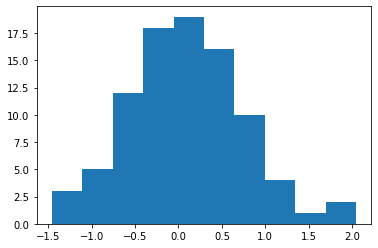

In [53]:
plt.hist(prices4['residual'])
plt.show()

# looks quite normal

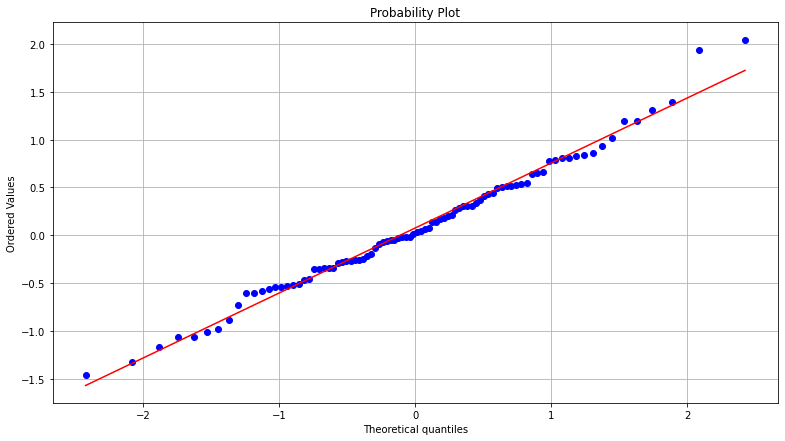

In [54]:
plt.figure(figsize = [13,7])
stats.probplot(prices4['residual'], plot = plt)

plt.grid()
plt.show()

In [55]:
# normality test

# if p-value > alpha --> fail to reject H0

stats.shapiro(prices4['residual'])

# p-value is larger than 0.05 --> the distribution of this data is no different from normal distribution
# Therefore, the assumption of normality is not violated by this model

ShapiroResult(statistic=0.9879114031791687, pvalue=0.5782548785209656)

In [56]:
MSE4 = mean_squared_error(prices4['log_price'],prices4['logprice_pred'])
RMSE4 = math.sqrt(MSE4)

print(f'MSE : {MSE4:.3f} , RMSE : {RMSE4:.3f}')

MSE : 0.454 , RMSE : 0.674


In [57]:
MAE4 = mean_absolute_error(prices4['log_price'],prices4['logprice_pred'])

print(f'MAE : {MAE4:.3f}')

MAE : 0.525


In [58]:
# Calculating the prediction interval

sum_err = sum(prices4['residual']**2)
stdev = (1/(len(prices4) -2 ) * sum_err)**0.5
z_score = stats.norm.ppf(1 - (1-0.95)/2)
z_score
interval4 = z_score*stdev

interval4

1.3354333304562944

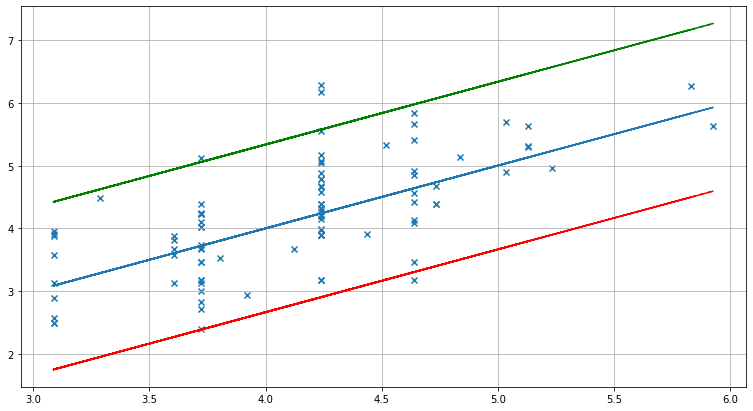

In [59]:
plt.figure(figsize = [13,7])
plt.plot(y_pred, y_pred)
plt.plot(y_pred, y_pred+interval4, color = 'green', linestyle = '--')
plt.plot(y_pred, y_pred-interval4, color = 'red', linestyle = '--')
plt.scatter(y_pred,y_test, marker = 'x')

plt.grid()
plt.show()

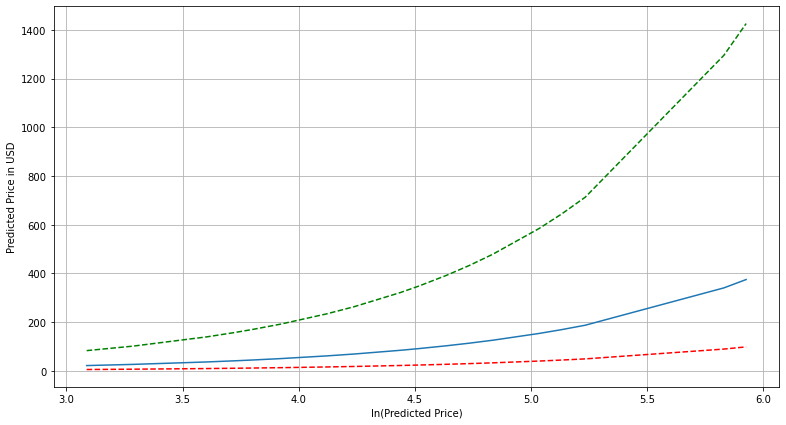

In [60]:
plt.figure(figsize = [13,7])
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values()))
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values() + interval4), linestyle = '--', color = 'green')
plt.plot(y_pred.sort_values(), np.exp(y_pred.sort_values() - interval4), linestyle = '--', color = 'red')

plt.xlabel('ln(Predicted Price)')
plt.ylabel('Predicted Price in USD')
plt.grid()
plt.show()

# Looks pretty similar to that of the third model

# 5. Models Evaluation

From the four regression models, we are left with 2 valid models:
1. The third model, where:
    - The target variable (price) is log-transformed
    - The predictor variables are maximum number of guests, whether there is a swimming pool, and whether it isthe entire unit
    
2. The fourth model, where:
    - The target variable (price) is log-transformed
    - The predictor variables are maximum number of guests, whether there is a swimming pool, whether it is the entire unit, and whether it is PLUS accommodation

Both models are valid, but which one is better?
Let's see the following table that helps us comparing the metrics of each model:

In [61]:
met_index = ['MSE', 'RMSE', 'MAE', 'Prediction Interval', 'R-squared']
met_dict = {'Third Model' : [MSE3, RMSE3, MAE3, interval3, r2_3], 'Fourth Model' : [MSE4, RMSE4, MAE4, interval4, r2_4]}

comparison = pd.DataFrame(data = met_dict, index = met_index)
comparison

,Third Model,Fourth Model
MSE,0.464620,0.453929
RMSE,0.681631,0.673743
MAE,0.537260,0.525104
Prediction Interval,1.351068,1.335433
R-squared,0.450688,0.467190


- Remember that the third and fourth model have same measurement unit (both have target that are log-transformed). 
- Therefore, we can compare the metrics of each model with the other.
- From those metrics, we can tell that the fourth model is better than the third model(lower errors and higher r-squared), albeit being very slightly. 
- The next thing we would like to consider is the number of predictors.
- Too few predictors, then the model will be biased
- Too many predictors, then the model will be less precise

- In this case, I personally I prefer the fourth model because I believe that whether an accommodation granted Plus status by Airbnb is an important factor in determining the final pricing.

- Thus, I pick the fourth model


In [62]:
# Our Linear Model

const, coef_x1, coef_x2, coef_x3, coef_x4 = modelAPI.params
print(f'ln(y) = {const:.3f} + {coef_x1:.3f}x1 + {coef_x2:.3f}x2 + {coef_x3:.3f}x3 + {coef_x4:.3f}x4') # This is our regression function

ln(y) = 2.689 + 0.199x1 + 0.494x2 + 0.517x3 + 0.636x4


In [63]:
# We should not forget that the above function is for the value of ln($)
# Therefore, to revert it back to $, we need to invert the function with exponential function
print(f'y = {np.exp(const):.2f} x e^{coef_x1:.2f}x1 x e^{coef_x2:.2f}x2 x e^{coef_x3:.2f}x3 x e^{coef_x4:.2f}x4')

y = 14.72 x e^0.20x1 x e^0.49x2 x e^0.52x3 x e^0.64x4


In [64]:
# Predicting the price of our preferred accommodation:

x1 = 4 # max_guest (integer)
x2 = 0 # PLUS = 1, REGULAR/SUPERHOST = 0 (binary)
x3 = 1 # Entire Unit = 1, Room Only = 0 (binary)
x4 = 1 # with swimming pool = 1, without swimming pool = 0 (binary)

ln_y = const + coef_x1*x1 + coef_x2*x2 + coef_x3*x3 + coef_x4*x4 

price_predicted = np.exp(ln_y)
price_upperbound = np.exp(ln_y + interval4)
price_lowerbound = np.exp(ln_y - interval4)

In [65]:
print(f'Average Price : $ {price_predicted:.2f}')
print(f'Upper-bound Price : $ {price_upperbound:.2f}')
print(f'Lower-bound Price : $ {price_lowerbound:.2f}')

Average Price : $ 103.28
Upper-bound Price : $ 392.63
Lower-bound Price : $ 27.17
